# REML based fitting

## Importing the Libraries

In [1]:
import pickle
from Functions import *
from matplotlib.pyplot import *

## Getting the Data

In [2]:
Data = pickle.load( open( "ts1.p", "rb" ))

## Model Fitting the Plotting

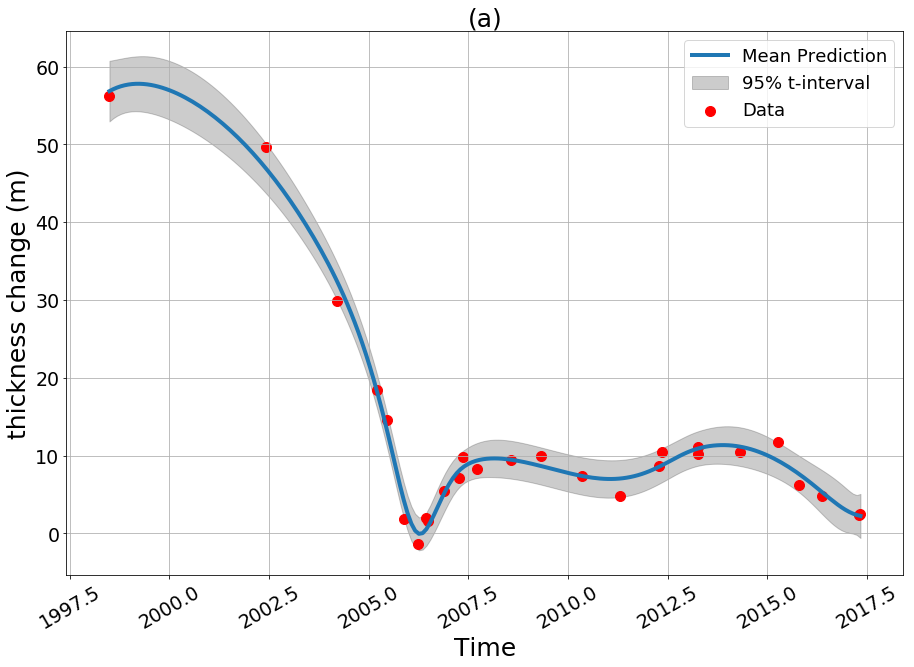

In [3]:
## Setting up the fiure and axis
fig = figure(figsize=(15,10))
ax = subplot2grid((1,1),(0,0))

## Chossing hyperparameters and initializations
p = 4;q=3
n = int(Data.shape[0])
par = [0.1,0.1]

## Learning and Predicting
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
c = n+p
P = Penalty_p(q,c)
X,Z,C,sigma,D = XZsigma(B,P,q)
lamb,sig = max_reml(par,Data,X,Z,sigma)

### Predicting
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
Xpred,Zpred,Cpred,sigma,D = XZsigma(Bpred,P,q)
ypred3,std_t3,std_n3 = Inference(Data,Cpred,C,lamb,sig,D,confidence=0.95)

## Plotting
ax.plot(xpred,ypred3,linewidth=4,label='Mean Prediction')
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred3.flatten()-std_t3,ypred3.flatten()+std_t3, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.grid(True)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
ax.scatter(Data[:,0],Data[:,1],label = 'Data',color = 'r',s=100)
ax.legend(fontsize=18)
ax.grid(True)
show()